<a href="https://colab.research.google.com/github/Kac1509/ZebrafishClassifier/blob/master/ClassifierFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys
import os

#Set if running locally or in Google Col}aboratory
Colab = False
if Colab:
    Script_path = '/content/gdrive/My Drive/Colab Notebooks/CNN_Classifier/scripts'
    Base_path = '/content/gdrive/My Drive/Colab Notebooks/CNN_Classifier/'
    from google.colab import drive
    drive.mount('/content/gdrive')
else:
    Script_path = os.getcwd() + '/CNN_Classifier/scripts'
    Base_path = 'CNN_Classifier/'

#Add script folder to system path
sys.path.insert(0, Script_path)
print(sys.path)

%load_ext autoreload
%autoreload 2


from CNN_Model import *
from DataVisualization import *
from Genotype import *
from HyperparameterTuning import *
from Predictions import *
from Setup import *
#from run import *



['C:\\Users\\Kaleem\\EPFL\\Fall 2018\\Machine Learning\\Project_2\\Git\\ZebrafishClassifier/CNN_Classifier/scripts', 'C:\\Users\\Kaleem\\EPFL\\Fall 2018\\Machine Learning\\Project_2\\Git\\ZebrafishClassifier/Classifier/scripts', '', 'C:\\Users\\Kaleem\\Anaconda3\\python36.zip', 'C:\\Users\\Kaleem\\Anaconda3\\DLLs', 'C:\\Users\\Kaleem\\Anaconda3\\lib', 'C:\\Users\\Kaleem\\Anaconda3', 'C:\\Users\\Kaleem\\AppData\\Roaming\\Python\\Python36\\site-packages', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Kaleem\\AppData\\Roaming\\SPB_Data\\.ipython']
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\Kaleem\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
Paths = setupEnvironment(Base_path,'DataStraightened.zip')

In [4]:
Genotypes = createGenotypes(Paths)

3


31
76
33
Found 66 images belonging to 3 classes.
Found 27 images belonging to 3 classes.
Epoch 1/20
 - 14s - loss: 0.6284 - acc: 0.6818 - val_loss: 0.5146 - val_acc: 0.7531
Epoch 2/20
 - 13s - loss: 0.4967 - acc: 0.7576 - val_loss: 0.4743 - val_acc: 0.8272
Epoch 3/20
 - 13s - loss: 0.4541 - acc: 0.7929 - val_loss: 0.4232 - val_acc: 0.8272
Epoch 4/20
 - 13s - loss: 0.3787 - acc: 0.8535 - val_loss: 0.3850 - val_acc: 0.8395
Epoch 5/20
 - 13s - loss: 0.3607 - acc: 0.8535 - val_loss: 0.3501 - val_acc: 0.8765
Epoch 6/20
 - 13s - loss: 0.3283 - acc: 0.9141 - val_loss: 0.3392 - val_acc: 0.8395
Epoch 7/20
 - 13s - loss: 0.3028 - acc: 0.9141 - val_loss: 0.3047 - val_acc: 0.8889
Epoch 8/20
 - 13s - loss: 0.2852 - acc: 0.9141 - val_loss: 0.2951 - val_acc: 0.9506
Epoch 9/20
 - 13s - loss: 0.2797 - acc: 0.9444 - val_loss: 0.3077 - val_acc: 0.8519
Epoch 10/20
 - 13s - loss: 0.2738 - acc: 0.9141 - val_loss: 0.2797 - val_acc: 0.8519
Epoch 11/20
 - 13s - loss: 0.2543 - acc: 0.9192 - val_loss: 0.2452 - v

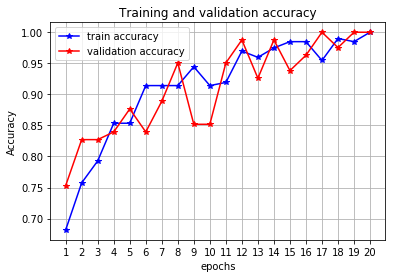

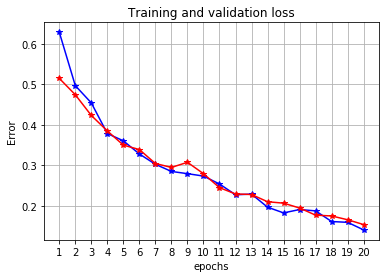

In [5]:
Tuning = False
if Tuning:

    #These are the hyperparameters tested
    #learning_rates = np.logspace(-7, -2, 7)
    #hidden_nodes = [4, 8, 16, 32, 64, 128, 256, 512, 1024]
    #input_sizes = [[75,750],[75,375], [75,150], [75,75], [50,50]]
    dropout = np.linspace(0.1, 0.5, 5)
    Plot_Xlabel = 'Dropout Rate'
    
    
    Parameters = setParameters(Paths, shapeY = 50, shapeX = 50,
                                    dropout_rate = 0,
                                    LR = 0.0001,
                                    num_nodes = 256,
                                    VGG16 = True,
                                    Dropout = False)
    Hyperparameters,Losses = Hyperparameter_tuning(Paths,
                                                   Genotypes,
                                                   Parameters,
                                                   Hyperparameter = dropout,
                                                   epochs = 3,
                                                   k_fold = 2)
    
    cross_validation_visualization(Hyperparameters,Losses[0], Losses[1],Losses[2], Losses[3],Plot_Xlabel)

else:
    #Partition data into training and test set
    createTrain_Test(Genotypes,training_size = 0.7, fixed = True)
    
    Parameters = setParameters(Paths,
                               shapeY = 100, shapeX = 100,
                               dropout_rate = 0,
                               LR = 0.0001,
                               num_nodes = 256,
                               VGG16 = True,
                               Dropout = False)
    
    Hist,Mdl = runModel(Paths,Genotypes,Parameters,epochs=20)
    
    plot_loss_acc(Hist)
    
    
    #Format predictions to 4 decimal points
    float_formatter = lambda x: "%.4f" % x
    np.set_printoptions(formatter={'float_kind':float_formatter})
    
    #Predict Inages in prediction path and save predictions to a csv file
    predictionFiles, predictions = predictClass(Mdl,Paths, Parameters, class_mode='categorical')
    savePredictions(Paths,predictions,predictionFiles,Parameters)

